In [2]:
# Load dependencies
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from tensorflow.keras.models import load_model
import pandas as pd

In [3]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 

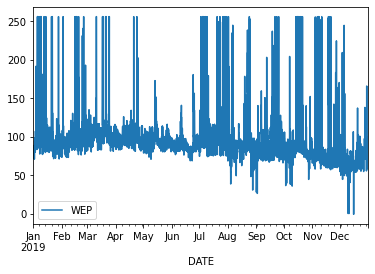

In [10]:
df_2019 = pd.read_csv("2019_WEP_Truncated.csv", index_col=0, parse_dates=True)
df_2019_backup = df_2019.copy()



df_2019.plot()


In [12]:
values = df_2019.values
data = series_to_supervised(values, 336, 1, False)
data.index = df_2019.index
#data['PERIOD']=df_2019['PERIOD']
#data['day_of_week'] = data.index.dayofweek
#data['WEP']=data['var1(t)']
final_data = data.dropna()
#final_data['2019-12-28':'2019-12-28'].iloc[:20,-10:]

,var1(t-336),var1(t-335),var1(t-334),var1(t-333),var1(t-332),var1(t-331),var1(t-330),var1(t-329),var1(t-328),var1(t-327),...,var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
DATE,,,,,,,,,,,,,,,,,,,,,
2019-01-08 00:00:00,83.33,83.83,83.19,83.13,83.20,78.81,78.30,73.55,73.65,73.41,...,107.51,107.26,129.44,113.88,106.44,95.68,98.96,92.03,77.90,89.81
2019-01-08 00:30:00,83.83,83.19,83.13,83.20,78.81,78.30,73.55,73.65,73.41,73.46,...,107.26,129.44,113.88,106.44,95.68,98.96,92.03,77.90,89.81,87.82
2019-01-08 01:00:00,83.19,83.13,83.20,78.81,78.30,73.55,73.65,73.41,73.46,73.65,...,129.44,113.88,106.44,95.68,98.96,92.03,77.90,89.81,87.82,88.63
2019-01-08 01:30:00,83.13,83.20,78.81,78.30,73.55,73.65,73.41,73.46,73.65,73.38,...,113.88,106.44,95.68,98.96,92.03,77.90,89.81,87.82,88.63,89.57
2019-01-08 02:00:00,83.20,78.81,78.30,73.55,73.65,73.41,73.46,73.65,73.38,73.29,...,106.44,95.68,98.96,92.03,77.90,89.81,87.82,88.63,89.57,88.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 21:30:00,76.04,75.89,84.97,81.32,75.47,71.17,68.55,68.06,66.86,66.35,...,78.80,75.59,76.13,79.69,79.62,79.21,79.40,79.94,78.58,75.21
2019-12-31 22:00:00,75.89,84.97,81.32,75.47,71.17,68.55,68.06,66.86,66.35,66.36,...,75.59,76.13,79.69,79.62,79.21,79.40,79.94,78.58,75.21,72.43
2019-12-31 22:30:00,84.97,81.32,75.47,71.17,68.55,68.06,66.86,66.35,66.36,65.97,...,76.13,79.69,79.62,79.21,79.40,79.94,78.58,75.21,72.43,69.58


In [13]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17184 entries, 2019-01-08 00:00:00 to 2019-12-31 23:30:00
Columns: 337 entries, var1(t-336) to var1(t)
dtypes: float64(337)
memory usage: 44.3 MB


In [24]:
df_2020 = pd.read_csv("2020_WEP.csv", index_col=0, parse_dates=True)
arr = final_data['2019-11-21':'2019-11-21'].dropna().to_numpy()
print(arr.shape)
arr[1, :-1].shape
arr[1,336]

(48, 337)


68.91

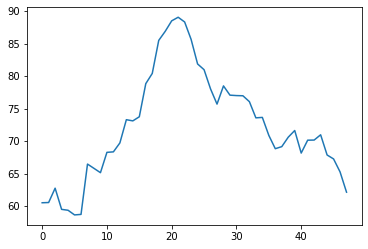

In [31]:
model = load_model('model_MLP_2.h5')

result = model.predict(arr[0:1,:-1])
result[0]

pyplot.plot(result[0])

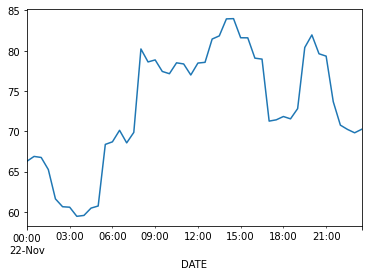

In [26]:
 df_2019_backup['2019-11-22':'2019-11-22']['WEP'].plot()
    

In [ ]:
'''model = load_model('model_MLP.h5')
steps=48
c=-4
for step in range (1,steps,1):
    result = model.predict(arr[step-1:step,:-1])
    arr[step,338] = result[0]
    if step!=47:
        arr[step+1,-4]= result[0]
    print (result[0])'''

